In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install keras_unet_collection

     |████████████████████████████████| 67 kB 5.3 MB/s 


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [4]:
from keras_unet_collection import models, losses
import tensorflow as tf
from tensorflow import keras
import xarray as xr
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import csv
import glob
from matplotlib import pyplot as plt

In [5]:
print('Hello World')
infiles = glob.glob('./gdrive/MyDrive/images_for_learning/*')
#metadata_outfile_name = './gdrive/MyDrive/Unet_test_regression/unet_regression_test13_output.csv'

Hello World


In [16]:
checkpoint_path = './gdrive/MyDrive/Unet_test_regression/regression_test_14_1/*'
#metadata_outfile1_name = checkpoint_path + 'metadata_predict.csv'
predictions_outfile_name = checkpoint_path + 'predictions.nc'

In [8]:
ds = xr.open_mfdataset(infiles, concat_dim='n_samples',combine='nested', parallel=True, engine='netcdf4')
ds


,Array,Chunk
Bytes,404.06 MB,2.05 MB
Shape,"(49324, 32, 32)","(250, 32, 32)"
Count,600 Tasks,200 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,404.06 MB,2.05 MB
Shape,"(49324, 32, 32)","(250, 32, 32)"
Count,600 Tasks,200 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [9]:
#read in the data
ds = xr.open_mfdataset(infiles, concat_dim='n_samples',combine='nested', parallel=True)
print(ds)

#Separate the data array into ml input, ml output and metadata
output_ds = ds.mesh_90
output_array = output_ds.values

mesh = ds.mesh.values
mesh_90_percentiles = ds.mesh_90_percentiles.values
mesh_90_mean = ds.mesh_90_mean.values
mesh_90_std = ds.mesh_90_std.values
mesh_90 = ds.mesh_90.values
meshfrac = ds.meshfrac.values
time = ds.time.values
lon = ds.lon.values
lat = ds.lat.values


input_ds = ds.drop(('mesh_90_mean','mesh_90_percentiles','mesh_90_std','mesh','mesh_90','meshfrac','time','lon','lat'))
variables = []
for variable in input_ds:
    variables.append(ds[variable])
    print(variable)
input_array = np.stack(variables)


<xarray.Dataset>
Dimensions:              (dim_0: 1, n_samples: 49324, qunatile2: 7, x: 32, y: 32)
Coordinates:
    longitude            (n_samples, x, y) float64 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    latitude             (n_samples, x, y) float64 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    longitude2           (n_samples, x, y) float64 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    latitude2            (n_samples, x, y) float64 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
Dimensions without coordinates: dim_0, n_samples, qunatile2, x, y
Data variables: (12/25)
    temp_sfc             (n_samples, x, y) float32 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    dewtemp_sfc          (n_samples, x, y) float32 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    w_sfc                (n_samples, x, y) float32 dask.array<chunksize=(244, 32, 32), meta=np.ndarray>
    u_sfc                (n_samples, x, y) float32 dask.array<chunksiz

In [10]:
#Format the ml input and output arrays so the unet reads them correctly
input_array = np.swapaxes(input_array,0,1)
input_array = np.swapaxes(input_array,1,3)
output_array = np.swapaxes(output_array,1,2)

In [18]:
model = keras.models.load_model('./gdrive/MyDrive/Unet_test_regression/regression_test_14_1/*')

y_hat = model.predict(input_array)  
plt.show()

OSError: ignored

In [ ]:
y_hat

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

In [ ]:
y_hat.min()

1.0

In [ ]:
y_hat.shape


(49324, 32, 32, 1)

In [ ]:
index = []
for i in range(mesh_90.shape[0]):
    if(mesh_90[i,:,:].max() > 50):
         index.append(i)

In [ ]:
def plot_ml_output(output, idx = 0):
  keys = ["Regression Output"]
  fig, axes = plt.subplots(1,2,figsize=(20,5))
  axes = axes.ravel()
  for i,ax in enumerate(axes[:-1]):
    pm = ax.imshow(output[idx,:,:,i],cmap = 'cividis',vmin = 0,vmax = 1)
    ax.set_title(keys[i])
    plt.colorbar(pm, ax=ax,shrink=0.60)
  axes[-1].axis(False)
  plt.tight_layout()

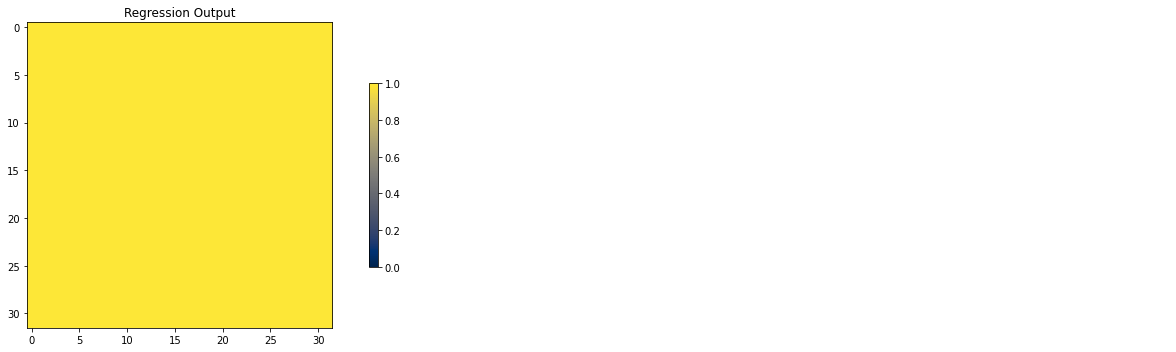

In [ ]:
plot_ml_output(y_hat, idx=index[0])